**Modeling trainnnig**


Clean Dataset

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("Uploaded:", filename)

df = pd.read_csv(filename, encoding="latin1")

df = df.loc[:, ~df.columns.str.contains("Unnamed")]
df = df.dropna(how="all")

print(df.columns)
print(df.shape)
df.head()


Saving 800_Producers_Book_Adaptations_Master.csv to 800_Producers_Book_Adaptations_Master (2).csv
Uploaded: 800_Producers_Book_Adaptations_Master (2).csv
Index(['Producer Name', 'Book Title', 'Book Author', 'Book Synopsis',
       'Book Genre', 'Production Title', 'Production Synopsis',
       'Production Genre', 'Outcome Type', 'Year Released',
       'Production Company'],
      dtype='object')
(831, 11)


,Producer Name,Book Title,Book Author,Book Synopsis,Book Genre,Production Title,Production Synopsis,Production Genre,Outcome Type,Year Released,Production Company
0,Bong Joon-ho,Parasite,Bong Joon-ho,A poor family schemes to infiltrate a wealthy ...,Original Screenplay,Parasite,A poor family cons their way into working for ...,Dark Comedy,Movie,2019,CJ Entertainment
1,Park So-dam,Snowpiercer,Jacques Lob and Jean-Marc Rochette,Survivors on a train circle a frozen Earth,Graphic Novel,Snowpiercer,The last humans live on a perpetually moving t...,Science Fiction,TV Series,2020,TNT
2,Damon Lindelof,Watchmen,Alan Moore and Dave Gibbons,Superheroes in an alternate America,Graphic Novel,Watchmen,A world where superheroes exist and affect his...,Superhero,TV Series,2019,HBO
3,Zack Snyder,Watchmen,Alan Moore and Dave Gibbons,Superheroes face moral complexities,Graphic Novel,Watchmen,Costumed heroes confront a global conspiracy,Superhero,Movie,2009,Warner Bros
4,Robert Kirkman,The Walking Dead,Robert Kirkman,Survivors navigate zombie apocalypse,Graphic Novel,The Walking Dead,Sheriff wakes to find world overrun by zombies,Horror Drama,TV Series,2010,AMC


In [ ]:
safe_name = "Producers_Book_Adaptations_clean.csv"
df.to_csv(safe_name, index=False, encoding="utf-8")
files.download(safe_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.columns


Index(['Producer Name', 'Book Title', 'Book Author', 'Book Synopsis',
       'Book Genre', 'Production Title', 'Production Synopsis',
       'Production Genre', 'Outcome Type', 'Year Released',
       'Production Company'],
      dtype='object')

In [ ]:
df.shape

(831, 11)

In [ ]:
texts = (
    df['Book Synopsis'].astype(str).fillna('') + ' ' +
    df['Production Synopsis'].astype(str).fillna('')
).tolist()

texts[:3]

['A poor family schemes to infiltrate a wealthy household A poor family cons their way into working for a rich family',
 'Survivors on a train circle a frozen Earth The last humans live on a perpetually moving train',
 'Superheroes in an alternate America A world where superheroes exist and affect history']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
)

X_tfidf = tfidf_vectorizer.fit_transform(texts)

X_tfidf.shape


(831, 2201)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_cluster = 20
Ks = range(2, n_cluster+1)
scores = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X_tfidf)
    score = silhouette_score(X_tfidf, labels)
    print(f"k = {k:2d}, silhouette = {score:.4f}")
    scores.append(score)

best_k = Ks[scores.index(max(scores))]
best_score = max(scores)

print("----------")
print("Best k =", best_k, "with silhouette score =", best_score)


k =  2, silhouette = 0.0034
k =  3, silhouette = 0.0050
k =  4, silhouette = 0.0057
k =  5, silhouette = 0.0063
k =  6, silhouette = 0.0090
k =  7, silhouette = 0.0107
k =  8, silhouette = 0.0119
k =  9, silhouette = 0.0131
k = 10, silhouette = 0.0138
k = 11, silhouette = 0.0141
k = 12, silhouette = 0.0151
k = 13, silhouette = 0.0164
k = 14, silhouette = 0.0179
k = 15, silhouette = 0.0197
k = 16, silhouette = 0.0210
k = 17, silhouette = 0.0225
k = 18, silhouette = 0.0235
k = 19, silhouette = 0.0253
k = 20, silhouette = 0.0264
----------
Best k = 20 with silhouette score = 0.026437274731659962


In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=n_cluster, random_state=42)


labels_kmeans = kmeans.fit_predict(X_tfidf)

labels_kmeans[:10]

array([ 4, 15, 12, 15, 19, 19, 19,  4,  4, 14], dtype=int32)

In [ ]:
import numpy as np

np.unique(labels_kmeans)
df['kmeans_cluster'] = labels_kmeans
df['kmeans_cluster'].value_counts().sort_index()


,count
kmeans_cluster,
0,30
1,40
2,36
3,27
4,38
5,31
6,20
7,58
8,56


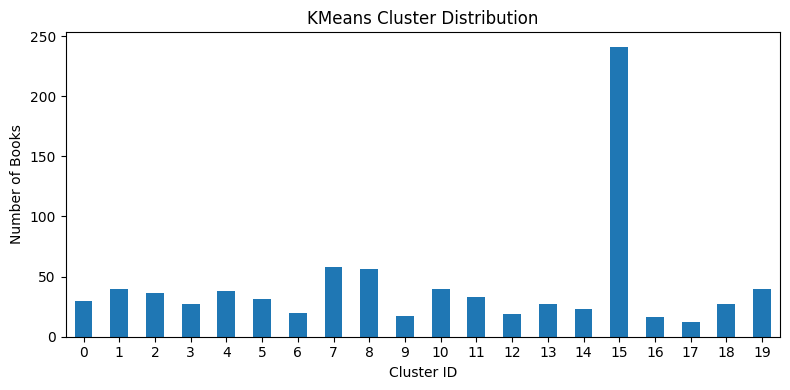

In [ ]:
import matplotlib.pyplot as plt

cluster_counts = df['kmeans_cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
cluster_counts.plot(kind='bar')

plt.title("KMeans Cluster Distribution")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Books")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
len(feature_names), feature_names[:20]

(2201,
 array(['11', '1100', '127', '13th', '1860s', '1893', '1900', '1920s',
        '1930s', '1940s', '1947', '1950s', '1960s', '1969', '1970s',
        '1980s', '1988', '1991', '1993', '1996'], dtype=object))

In [ ]:
centroids = kmeans.cluster_centers_
n_clusters = kmeans.n_clusters

print(f"Total clusters = {n_clusters}")

for cluster_id in range(n_clusters):
    print(f"\nCluster {cluster_id} – Top 15 keywords:")

    top_indices = centroids[cluster_id].argsort()[::-1][:15]
    top_words = [feature_names[i] for i in top_indices]

    print(top_words)


Total clusters = 20

Cluster 0 – Top 15 keywords:
['adventures', 'finds', 'bear', 'garden', 'home', 'island', 'notebook', 'paris', 'orphan', 'tiger', 'wild', 'anne', 'london', 'teen', 'curiosity']

Cluster 1 – Top 15 keywords:
['murder', 'investigates', 'case', 'detective', 'female', 'pi', 'solves', 'disappearance', 'tough', 'boston', 'investigate', 'marlowe', 'alaska', 'area', 'owls']

Cluster 2 – Top 15 keywords:
['time', 'girl', 'high', 'travel', 'discovers', 'uses', 'child', 'poetry', 'schooler', 'human', 'swap', 'bodies', 'dog', 'julia', 'girls']

Cluster 3 – Top 15 keywords:
['love', 'emotions', 'cooking', 'robot', 'artists', 'tita', 'waits', 'woman', 'circus', 'fall', 'lovers', 'recipes', 'forbidden', 'marriage', 'child']

Cluster 4 – Top 15 keywords:
['family', 'confronts', 'seven', 'generations', 'manson', 'dead', 'generational', 'piano', 'congo', 'housing', 'families', 'zombie', 'trip', 'dog', 'women']

Cluster 5 – Top 15 keywords:
['harry', 'mysterious', 'secrets', 'voldemor

### Topic Names (Model 1 – KMeans)

0. **Family-Friendly Adventure & Fairy Tales**  
1. **Female Detective & Crime Mystery**  
2. **YA Coming-of-Age & Body/Time Swap**  
3. **Romantic & Emotional Family Drama**  
4. **Multi-Generational Family Saga**  
5. **Magical School Fantasy (Harry Potter–like)**  
6. **Literary Memoir & Parent–Child Relationship**  
7. **Women’s Life Journey & Social Injustice**  
8. **Identity, Immigration & Ethnic Conflict**  
9. **Psychedelics, Art & Consciousness**  
10. **Post-Apocalyptic Survival & Dystopia**  
11. **Midlife Crisis & Self-Discovery**  
12. **U.S. Social History & Urban Pop Culture**  
13. **School Bureaucracy & Educational Satire**  
14. **Revenge, Heroism & Family Ties**  
15. **Rebellion & Violent Games (Hunger Games–like)**  
16. **Serial Killer & Detective Thriller**  
17. **Slavery, Escape & Historical Trauma**  
18. **Coming-of-Age Memoir & Cultural Roots**  
19. **Youth Friendship, Games & Identity**


In [ ]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(X_tfidf, labels_kmeans)
score_kmeans

np.float64(0.026437274731659962)

#Next Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# New model
texts = df['Book Synopsis'].fillna("")

count_vectorizer = CountVectorizer(
    max_features=5000,
    stop_words='english'
)

X_count = count_vectorizer.fit_transform(texts)

X_count.shape

(831, 1232)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


lda = LatentDirichletAllocation(
    n_components=20,
    random_state=42,
    learning_method='batch'
)

lda.fit(X_count)

LatentDirichletAllocation(n_components=20, random_state=42)

In [ ]:
feature_names_count = count_vectorizer.get_feature_names_out()

for topic_id, topic in enumerate(lda.components_):
    print(f"\nTopic {topic_id} top keywords:")
    top_indices = topic.argsort()[::-1][:10]
    top_words = [feature_names_count[i] for i in top_indices]
    print(top_words)


Topic 0 top keywords:
['man', 'america', 'life', 'investigates', 'murder', 'jungle', 'board', 'brings', 'game', 'love']

Topic 1 top keywords:
['murder', 'girl', 'wwii', 'father', 'bombardier', 'satirical', 'accused', 'boy', 'death', 'travels']

Topic 2 top keywords:
['battle', 'teen', 'trip', 'family', 'white', 'man', 'success', 'women', 'marriage', 'european']

Topic 3 top keywords:
['woman', 'teen', 'finds', 'survives', 'pandemic', 'cooking', '1980s', 'emotions', 'summer', 'life']

Topic 4 top keywords:
['family', 'american', 'searches', 'black', 'chinese', 'woman', 'age', 'coming', 'freedom', 'wild']

Topic 5 top keywords:
['girl', 'world', 'boy', 'memoir', 'woman', 'family', 'school', 'childhood', 'dysfunctional', 'discovers']

Topic 6 top keywords:
['investigates', 'couple', 'travel', 'city', 'wife', 'crimes', 'destroyed', 'crime', 'daughters', 'space']

Topic 7 top keywords:
['black', 'woman', 'family', 'life', 'chicago', 'journey', '1950s', 'dreams', 'south', 'middle']

Topic 

### LDA Topic Names (20 Topics)

0. **Crime Investigation in the Wild**  
1. **WWII Family Tragedy & Crime**  
2. **Teen Travel & Relationship Drama**  
3. **Pandemic Survival & Emotional Journey**  
4. **Cross-Cultural Identity & Freedom**  
5. **Dysfunctional Families & Childhood Memoir**  
6. **City Couple Crime Investigation**  
7. **Black American Family History**  
8. **Small-Town Detective & Family Secrets**  
9. **Heroic Rebellion & Supernatural Powers**  
10. **Food, Memoir & Desert Journeys**  
11. **Interconnected College Stories**  
12. **Magical Biography & Family Murder**  
13. **Post-Apocalyptic Family Survival**  
14. **WWII Revenge & Missing Children**  
15. **LAPD Crime & Justice Stories**  
16. **Imprisonment, Mystery & Wrongful Accusation**  
17. **Urban Life, Work & Personal Purpose**  
18. **Children in Peril & Dark Conspiracies**  
19. **Romantic Mystery Across Cities**


In [ ]:
lda_topics = lda.transform(X_count)
df["lda_topic"] = lda_topics.argmax(axis=1)
df[["Book Title", "lda_topic"]].head()

,Book Title,lda_topic
0,Parasite,19
1,Snowpiercer,8
2,Watchmen,0
3,Watchmen,7
4,The Walking Dead,13


In [ ]:
df["lda_topic"].value_counts()


,count
lda_topic,
4,58
12,53
3,51
14,47
11,46
17,46
10,46
8,46
5,45


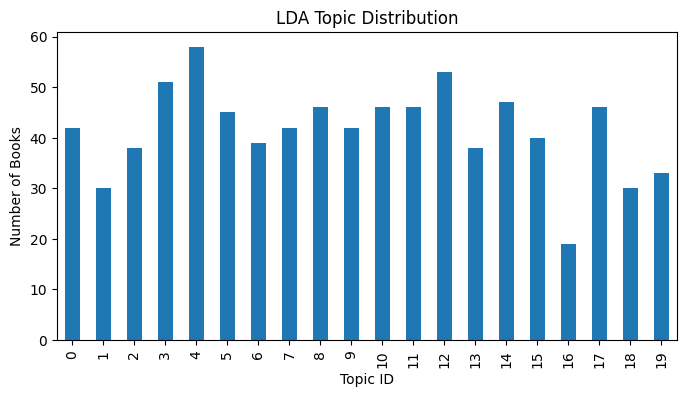

In [ ]:
import matplotlib.pyplot as plt

df["lda_topic"].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title("LDA Topic Distribution")
plt.xlabel("Topic ID")
plt.ylabel("Number of Books")
plt.show()


In [ ]:
lda_perplexity = lda.perplexity(X_count)
lda_perplexity

np.float64(1449.3024120581829)

##BERTopic Model

In [ ]:
!pip install bertopic
!pip install sentence-transformers

In [ ]:
import pandas as pd

texts = df['Book Synopsis'].fillna("").tolist()
len(texts)

831

In [ ]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(
    embedding_model=embedding_model,
    language="english",
    nr_topics="auto",
    verbose=True
)

topics, probs = topic_model.fit_transform(texts)

2025-11-20 21:12:33,738 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

2025-11-20 21:12:38,745 - BERTopic - Embedding - Completed ✓
2025-11-20 21:12:38,746 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-20 21:12:40,990 - BERTopic - Dimensionality - Completed ✓
2025-11-20 21:12:40,992 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-20 21:12:41,028 - BERTopic - Cluster - Completed ✓
2025-11-20 21:12:41,029 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-11-20 21:12:41,077 - BERTopic - Representation - Completed ✓
2025-11-20 21:12:41,078 - BERTopic - Topic reduction - Reducing number of topics
2025-11-20 21:12:41,092 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-20 21:12:41,129 - BERTopic - Representation - Completed ✓
2025-11-20 21:12:41,133 - BERTopic - Topic reduction - Reduced number of topics from 31 to 31


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,136,-1_american_lawyer_chinese_building,"[american, lawyer, chinese, building, life, st...","[Board game brings jungle to life, Katniss bec..."
1,0,56,0_murder_lapd_investigates_detective,"[murder, lapd, investigates, detective, pi, of...","[Female PI investigates old murder, Retired de..."
2,1,46,1_searches_boy_dog_wild,"[searches, boy, dog, wild, for, tiger, pirate,...","[Pirate searches for ultimate treasure, Pirate..."
3,2,46,2_girl_demon_japan_bear,"[girl, demon, japan, bear, princess, save, old...","[Girl cursed into old woman meets wizard, Girl..."
4,3,38,3_wwii_school_nazi_take,"[wwii, school, nazi, take, bombardier, satiric...","[Satirical take on WWII bombardier, Satirical ..."
5,4,37,4_memoir_dysfunctional_schooler_illustrated,"[memoir, dysfunctional, schooler, illustrated,...","[Middle schooler's illustrated journal, Memoir..."
6,5,32,5_harry_boy_discovers_voldemort,"[harry, boy, discovers, voldemort, about, lear...","[Harry learns about Voldemort's past, Harry, R..."
7,6,29,6_bond_afghan_bank_wall,"[bond, afghan, bank, wall, robber, street, kil...","[Two Afghan women form bond through hardship, ..."
8,7,27,7_man_imprisoned_when_grumpy,"[man, imprisoned, when, grumpy, purpose, men, ...","[Grumpy man finds new purpose, Young couple se..."
9,8,26,8_food_cop_critic_ex,"[food, cop, critic, ex, chef, restaurant, inve...","[NY Times restaurant critic in disguise, Ex-co..."


In [ ]:
topic_model.get_topic(5)

[('harry', np.float64(0.11785764613333058)),
 ('boy', np.float64(0.08021128413886666)),
 ('discovers', np.float64(0.06179544702949938)),
 ('voldemort', np.float64(0.061473519585310984)),
 ('about', np.float64(0.05892882306666529)),
 ('learns', np.float64(0.05510427534028285)),
 ('plot', np.float64(0.05510427534028285)),
 ('kill', np.float64(0.05510427534028285)),
 ('witches', np.float64(0.05510427534028285)),
 ('wizard', np.float64(0.04917881566824879))]

In [ ]:
df["bertopic_topic"] = topics
df.head()

,Producer Name,Book Title,Book Author,Book Synopsis,Book Genre,Production Title,Production Synopsis,Production Genre,Outcome Type,Year Released,Production Company,kmeans_cluster,lda_topic,bertopic_topic
0,Bong Joon-ho,Parasite,Bong Joon-ho,A poor family schemes to infiltrate a wealthy ...,Original Screenplay,Parasite,A poor family cons their way into working for ...,Dark Comedy,Movie,2019,CJ Entertainment,4,19,4
1,Park So-dam,Snowpiercer,Jacques Lob and Jean-Marc Rochette,Survivors on a train circle a frozen Earth,Graphic Novel,Snowpiercer,The last humans live on a perpetually moving t...,Science Fiction,TV Series,2020,TNT,15,8,-1
2,Damon Lindelof,Watchmen,Alan Moore and Dave Gibbons,Superheroes in an alternate America,Graphic Novel,Watchmen,A world where superheroes exist and affect his...,Superhero,TV Series,2019,HBO,12,0,-1
3,Zack Snyder,Watchmen,Alan Moore and Dave Gibbons,Superheroes face moral complexities,Graphic Novel,Watchmen,Costumed heroes confront a global conspiracy,Superhero,Movie,2009,Warner Bros,15,7,4
4,Robert Kirkman,The Walking Dead,Robert Kirkman,Survivors navigate zombie apocalypse,Graphic Novel,The Walking Dead,Sheriff wakes to find world overrun by zombies,Horror Drama,TV Series,2010,AMC,19,13,16


<Axes: xlabel='bertopic_topic'>

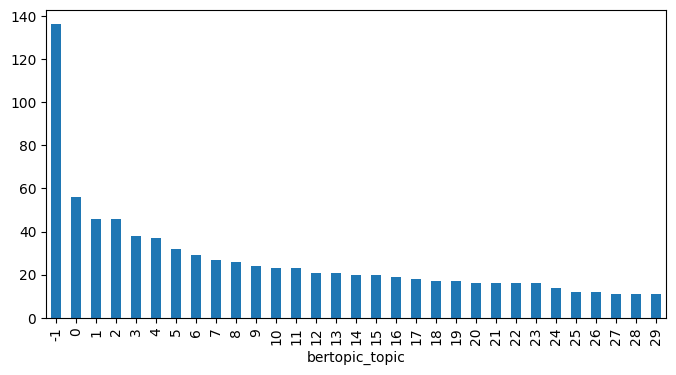

In [ ]:
df["bertopic_topic"].value_counts().sort_index().plot(kind="bar", figsize=(8,4))

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_topics()